# Exploração de Dados (EDA)

Nesta etapa, realizamos a exploração inicial do conjunto de dados de risco de crédito. O objetivo é compreender a estrutura dos dados, identificar a variável alvo, avaliar possíveis desbalanceamentos e observar relações iniciais entre variáveis e inadimplência.
Essa análise orienta as decisões de pré-processamento e modelagem nas etapas seguintes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", context="notebook")

In [2]:
DATA_RAW_PATH = "../data/raw/credit_data.csv"

df = pd.read_csv(
    DATA_RAW_PATH,
    sep=r"\s+",
    header=None,
    engine="python"
)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


O dataset original não possui cabeçalho. Os nomes das colunas foram definidos com base na documentação oficial do German Credit Dataset (`german.txt`), respeitando a ordem original.

In [3]:
columns = ["status_checking_account", "duration_months", "credit_history",
    "purpose", "credit_amount", "savings_account", "employment_since",
    "installment_rate", "personal_status_sex", "other_debtors",
    "residence_since", "property", "age", "other_installment_plans",
    "housing", "existing_credits", "job", "num_dependents",
    "telephone", "foreign_worker", "col_21", "col_22", "col_23", "col_24",
    "target"]

df.columns = columns
df.head()

,status_checking_account,duration_months,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,other_debtors,...,existing_credits,job,num_dependents,telephone,foreign_worker,col_21,col_22,col_23,col_24,target
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [4]:
with pd.option_context("display.max_columns", None):
    display(df)

,status_checking_account,duration_months,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,other_debtors,residence_since,property,age,other_installment_plans,housing,existing_credits,job,num_dependents,telephone,foreign_worker,col_21,col_22,col_23,col_24,target
0,1,6,4,12,5,5,3,4,1,67,3,2,1,2,1,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,3,1,1,1,1,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,3,1,2,1,1,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,3,1,2,1,1,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,3,2,2,1,1,1,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,17,1,4,2,4,1,31,3,1,1,1,1,0,0,1,0,0,1,0,1,0,1
996,1,30,2,39,1,3,1,4,2,40,3,1,1,2,1,0,1,1,0,0,1,0,0,0,1
997,4,12,2,8,1,5,3,4,3,38,3,1,1,1,1,0,0,1,0,0,1,0,0,1,1
998,1,45,2,18,1,3,3,4,4,23,3,1,1,2,1,0,0,1,0,0,0,0,0,1,2


A variável alvo (`target`) indica o comportamento de pagamento do cliente:
- 1: bom pagador
- 2: mau pagador

Para facilitar a interpretação do modelo, a variável será convertida para um formato binário,
onde:
- 0 representa clientes adimplentes
- 1 representa clientes inadimplentes

In [5]:
df["target"] = df["target"].map({1: 0, 2: 1})

df["target"].value_counts(normalize=True)

target
0    0.7
1    0.3
Name: proportion, dtype: float64

A distribuição da variável alvo permite identificar o nível de desbalanceamento entre as classes.

Em problemas de risco de crédito, é comum que a classe de inadimplentes seja minoritária.
Essa informação é importante para a escolha de métricas de avaliação e possíveis ajustes no modelo.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status_checking_account  1000 non-null   int64
 1   duration_months          1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   credit_amount            1000 non-null   int64
 5   savings_account          1000 non-null   int64
 6   employment_since         1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  residence_since          1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  exist

In [7]:
# Configuração temporária de visualização

with pd.option_context(
    "display.max_columns", None,
    "display.float_format", "{:.2f}".format
):
    display(df.describe())

,status_checking_account,duration_months,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,other_debtors,residence_since,property,age,other_installment_plans,housing,existing_credits,job,num_dependents,telephone,foreign_worker,col_21,col_22,col_23,col_24,target
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,2.58,20.90,2.54,32.71,2.10,3.38,2.68,2.85,2.36,35.55,2.67,1.41,1.16,1.40,1.04,0.23,0.10,0.91,0.04,0.18,0.71,0.02,0.20,0.63,0.30
std,1.26,12.06,1.08,28.25,1.58,1.21,0.71,1.10,1.05,11.38,0.71,0.58,0.36,0.49,0.19,0.42,0.30,0.29,0.20,0.38,0.45,0.15,0.40,0.48,0.46
min,1.00,4.00,0.00,2.00,1.00,1.00,1.00,1.00,1.00,19.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,12.00,2.00,14.00,1.00,3.00,2.00,2.00,1.00,27.00,3.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2.00,18.00,2.00,23.00,1.00,3.00,3.00,3.00,2.00,33.00,3.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
75%,4.00,24.00,4.00,40.00,3.00,5.00,3.00,4.00,3.00,42.00,3.00,2.00,1.00,2.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00
max,4.00,72.00,4.00,184.00,5.00,5.00,4.00,4.00,4.00,75.00,3.00,4.00,2.00,2.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


A análise descritiva fornece uma visão geral sobre:
- tipos de dados
- escalas das variáveis
- possíveis outliers
- necessidade de padronização

Essas informações serão utilizadas na etapa de pré-processamento.

In [15]:
target_counts["Classe_label"] = target_counts["Classe"].map({
    0: "Adimplente",
    1: "Inadimplente"
})

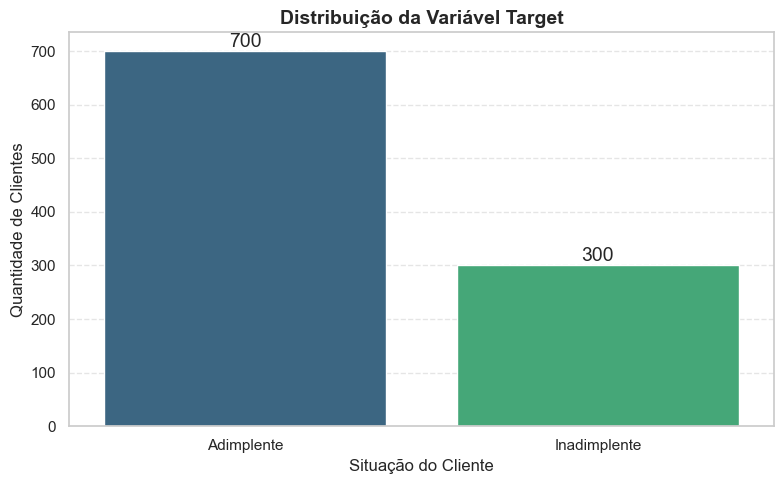

In [20]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(
    data=target_counts,
    x="Classe_label",
    y="Quantidade",
    hue="Classe_label",
    palette="viridis",
    legend=False,
    ax=ax
)

ax.set_title("Distribuição da Variável Target", fontsize=14, weight="bold")
ax.set_xlabel("Situação do Cliente")
ax.set_ylabel("Quantidade de Clientes")
ax.grid(axis="y", linestyle="--", alpha=0.5)

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=14
    )

plt.tight_layout()
plt.show()

Novamente observa-se um leve desbalanceamento entre as classes, cenário típico em problemas de risco de crédito.
Esse fator será considerado na avaliação do modelo, priorizando métricas além da acurácia.

## Análise das Variáveis Numéricas

In [21]:
df.columns

Index(['status_checking_account', 'duration_months', 'credit_history',
       'purpose', 'credit_amount', 'savings_account', 'employment_since',
       'installment_rate', 'personal_status_sex', 'other_debtors',
       'residence_since', 'property', 'age', 'other_installment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'telephone',
       'foreign_worker', 'col_21', 'col_22', 'col_23', 'col_24', 'target'],
      dtype='object')

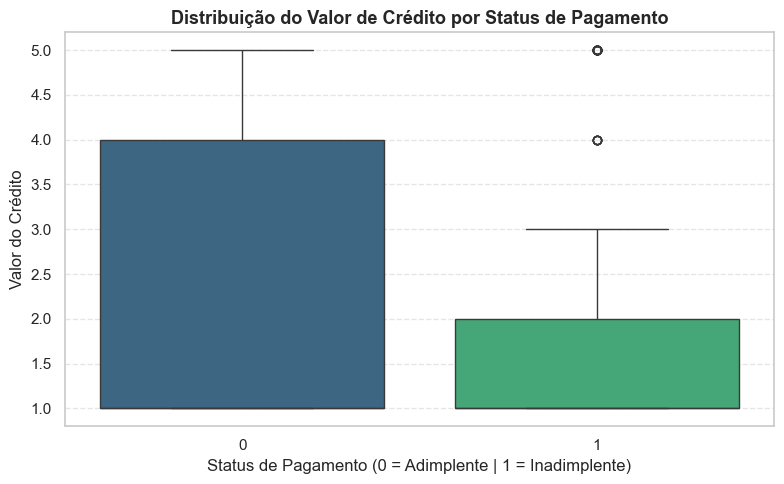

In [27]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(
    data=df,
    x="target",
    y="credit_amount",
    hue="target",
    legend=False,
    palette="viridis"
)

ax.set_title(
    "Distribuição do Valor de Crédito por Status de Pagamento",
    fontsize=13,
    weight="bold"
)

ax.set_xlabel("Status de Pagamento (0 = Adimplente | 1 = Inadimplente)")
ax.set_ylabel("Valor do Crédito")
ax.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

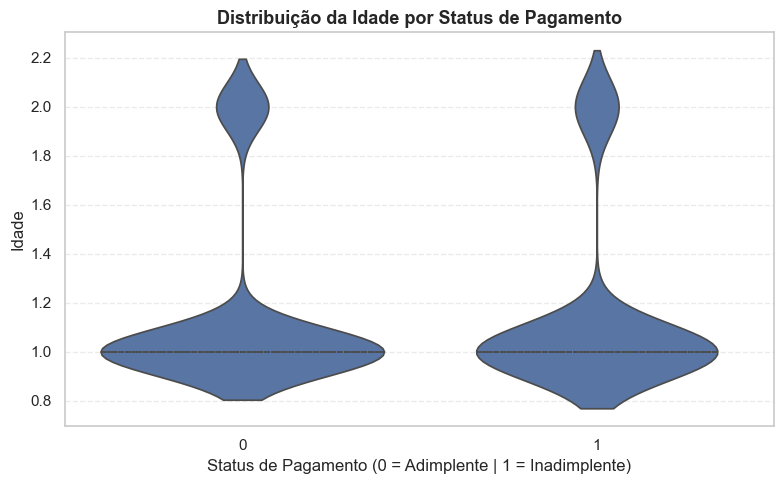

In [28]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.violinplot(
    data=df,
    x="target",
    y="age",
    inner="quartile",
    ax=ax
)

ax.set_title(
    "Distribuição da Idade por Status de Pagamento",
    fontsize=13,
    weight="bold"
)
ax.set_xlabel("Status de Pagamento (0 = Adimplente | 1 = Inadimplente)")
ax.set_ylabel("Idade")
ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


A variável idade apresenta distribuições semelhantes entre adimplentes e inadimplentes, indicando baixo poder discriminativo isolado.

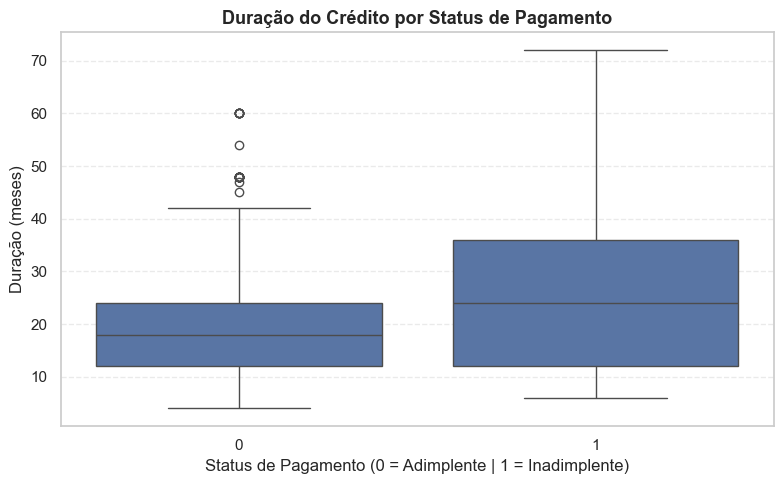

In [29]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(
    data=df,
    x="target",
    y="duration_months",
    ax=ax
)

ax.set_title(
    "Duração do Crédito por Status de Pagamento",
    fontsize=13,
    weight="bold"
)
ax.set_xlabel("Status de Pagamento (0 = Adimplente | 1 = Inadimplente)")
ax.set_ylabel("Duração (meses)")
ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


Os gráficos foram construídos utilizando a abordagem de orientação a objetos do Matplotlib, permitindo maior controle visual e padronização. A análise comparativa entre as classes mostra diferenças relevantes em variáveis como valor do crédito e duração do financiamento, indicando potencial preditivo dessas features para o modelo de risco.

In [30]:
def plot_categorical_target(df, col, ax):
    prop_df = (
        df.groupby(col)["target"]
        .value_counts(normalize=True)
        .rename("proportion")
        .reset_index()
    )

    sns.barplot(
        data=prop_df,
        x=col,
        y="proportion",
        hue="target",
        ax=ax
    )

    ax.set_ylabel("Proporção")
    ax.set_xlabel(col.replace("_", " ").title())
    ax.legend(title="Target (0 = Adimplente | 1 = Inadimplente)")
    ax.grid(axis="y", linestyle="--", alpha=0.4)

## Análise das Variáveis Categóricas

Nesta seção, analisamos variáveis categóricas em relação à inadimplência. A análise é feita em termos de proporção, permitindo comparar o comportamento de adimplentes e inadimplentes dentro de cada categoria.

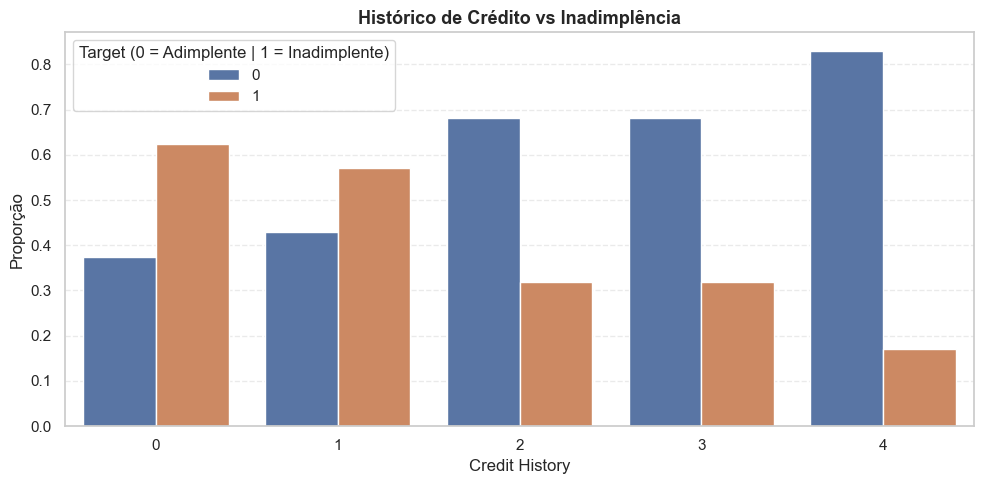

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))

plot_categorical_target(df, "credit_history", ax)

ax.set_title(
    "Histórico de Crédito vs Inadimplência",
    fontsize=13,
    weight="bold"
)

plt.tight_layout()
plt.show()

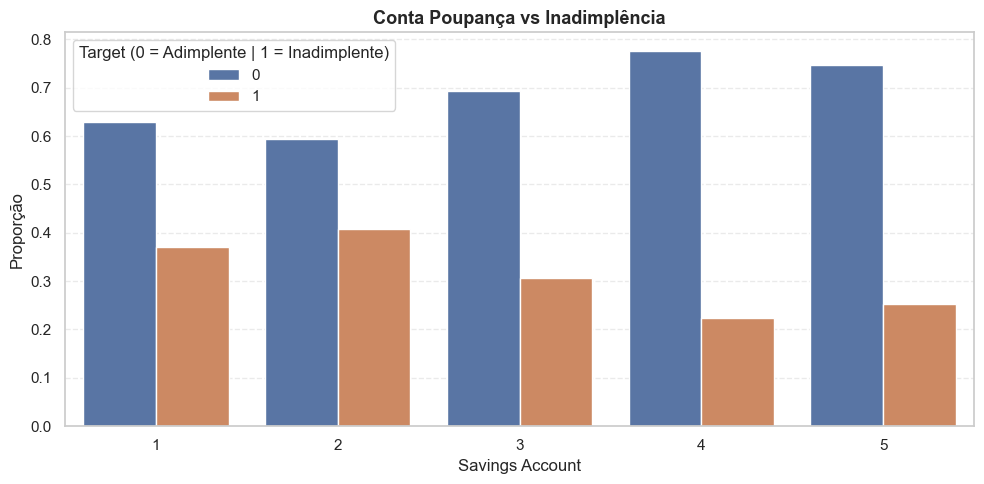

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))

plot_categorical_target(df, "savings_account", ax)

ax.set_title(
    "Conta Poupança vs Inadimplência",
    fontsize=13,
    weight="bold"
)

plt.tight_layout()
plt.show()

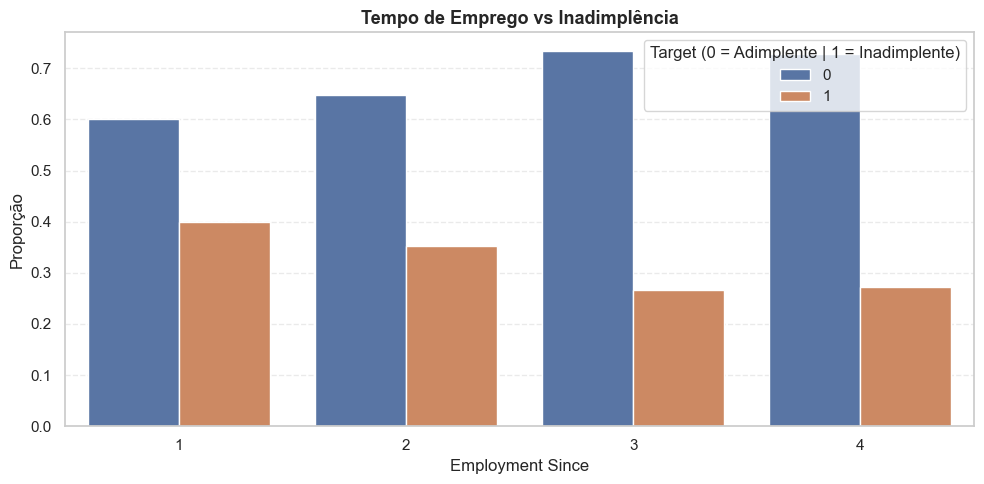

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))

plot_categorical_target(df, "employment_since", ax)

ax.set_title(
    "Tempo de Emprego vs Inadimplência",
    fontsize=13,
    weight="bold"
)

plt.tight_layout()
plt.show()

Observa-se que variáveis categóricas apresentam comportamentos distintos entre adimplentes e inadimplentes. Em especial, histórico de crédito, nível de poupança e estabilidade no emprego mostram diferenças relevantes nas proporções de inadimplência, indicando forte potencial preditivo. Essas variáveis serão consideradas com atenção na etapa de modelagem, utilizando técnicas adequadas de codificação.